In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython import display as ds
import matplotlib.image as mpimg
from skimage import util 
import cv2

%matplotlib inline

In [2]:
class Dataset:
    main = 'dataset/UCSD_Anomaly_Dataset.v1p2'
    trainpath = "{}/UCSDped1/Train/Train034".format(main)
    testpath = "{}/UCSDped1/Test/Test034".format(main)
    

In [3]:
#%%bash -s $Dataset.testpath
#ls $1/

In [4]:
from os import listdir
from os.path import isfile, join
onlyfiles = ["{}/{}".format(Dataset.trainpath, f) for f in listdir(Dataset.trainpath) ]
testfiles = ["{}/{}".format(Dataset.testpath, f) for f in listdir(Dataset.testpath) ]
print(len(onlyfiles), len(testfiles))

200 200


In [5]:
images = []
for f in onlyfiles:
    image = cv2.imread(f)
    images.append(image)
train_images = images#[15:25]
train_images = np.array(train_images)

In [6]:
images = []
for f in testfiles:
    image = cv2.imread(f)
    images.append(image)
test_images = images#[15:25]
test_images = np.array(test_images)

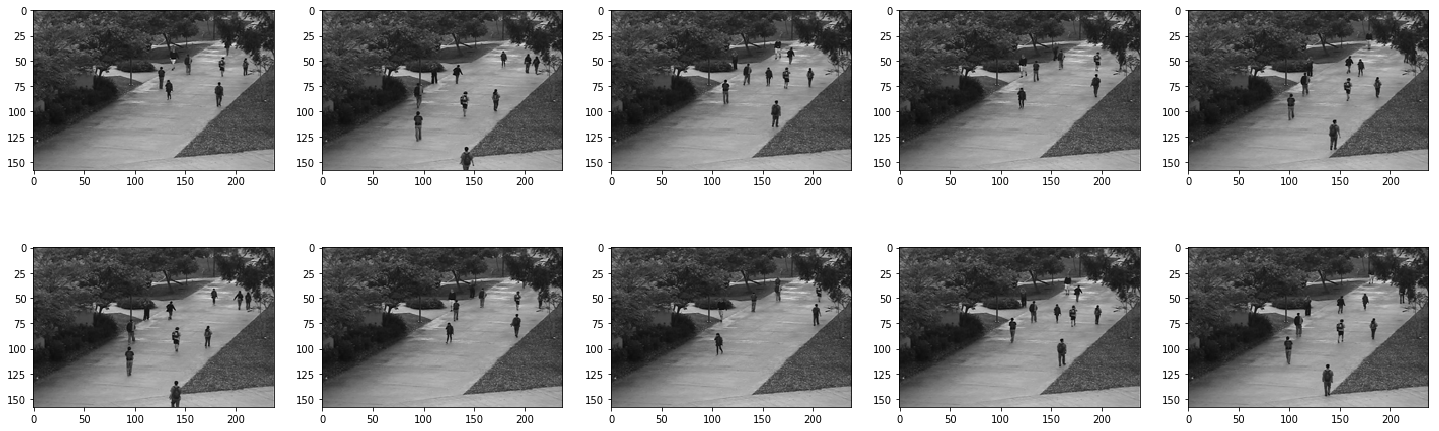

In [7]:
fig, axs = plt.subplots(2,5, figsize=(25, 8))
axs = axs.ravel()

for i, imgs in enumerate(train_images[15:25]):
    axs[i].imshow(imgs[:,:,:])
    
#image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [8]:
train_images.shape

(200, 158, 238, 3)

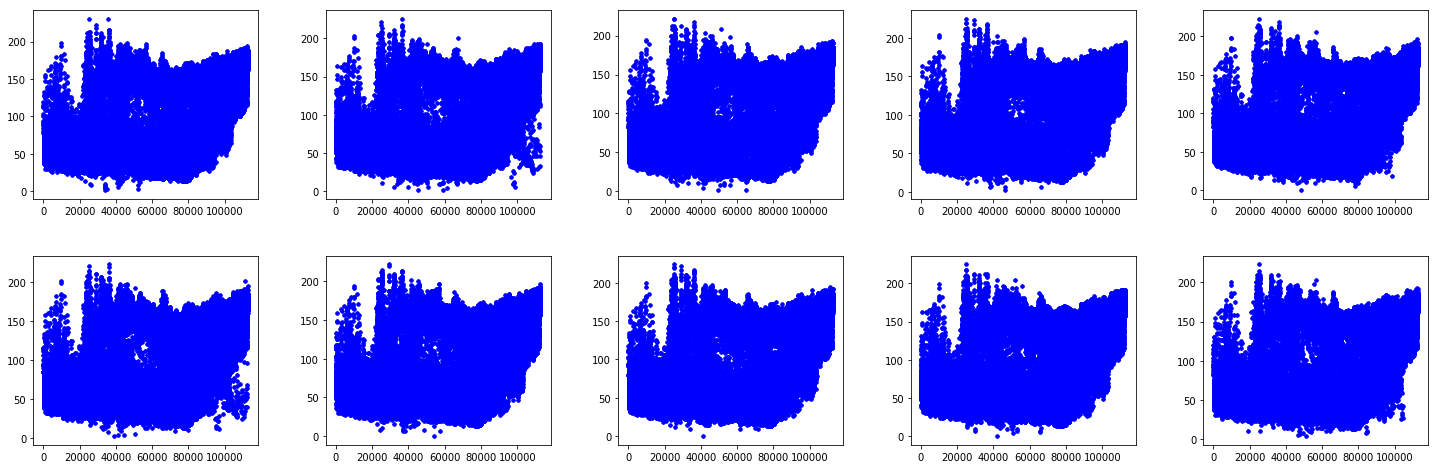

In [9]:
fig, axs = plt.subplots(2,5, figsize=(25,8))
fig.subplots_adjust(hspace = 0.3, wspace=0.3)
axs = axs.ravel()

for i, imgs in enumerate(train_images[15:25]):
    axs[i].plot(imgs.ravel(), 'b.')


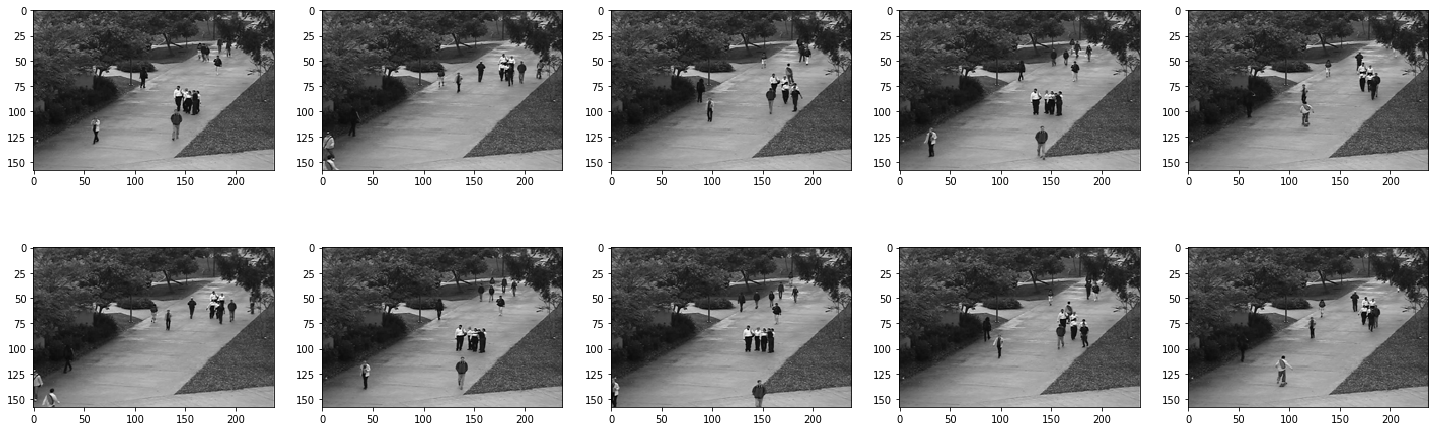

In [10]:
fig, axs = plt.subplots(2,5, figsize=(25,8))
axs = axs.ravel()

for i, imgs in enumerate(test_images[15:25]):
    axs[i].imshow(imgs[:,:,:])

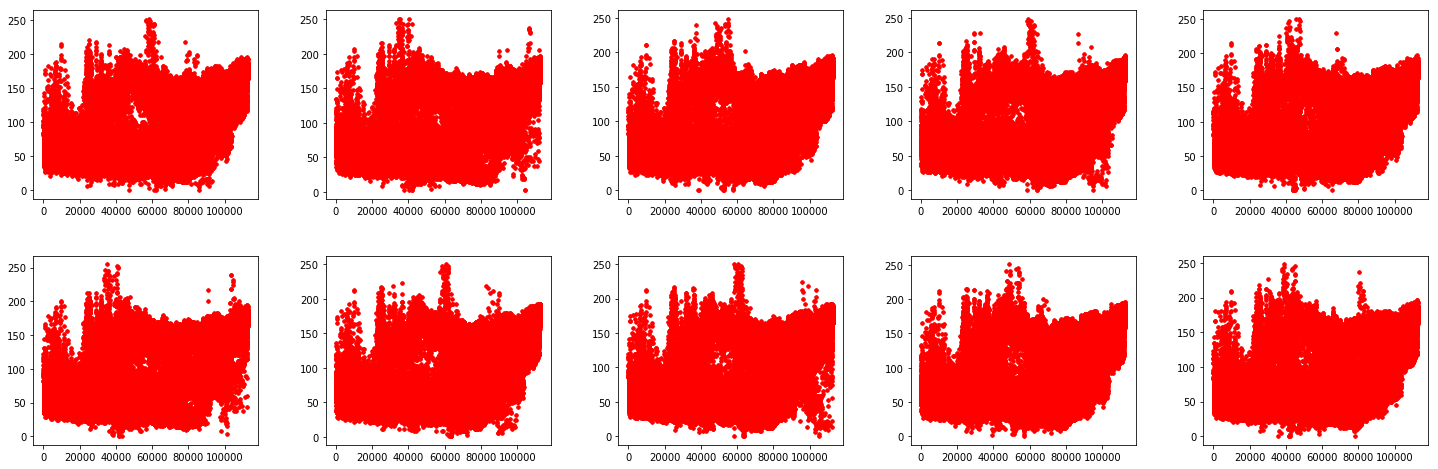

In [11]:
fig, axs = plt.subplots(2,5, figsize=(25, 8))
fig.subplots_adjust(hspace = 0.3, wspace=0.3)
axs = axs.ravel()

for i, imgs in enumerate(test_images[15:25]):
    axs[i].plot(imgs.ravel(), 'r.')

Adding noise to images

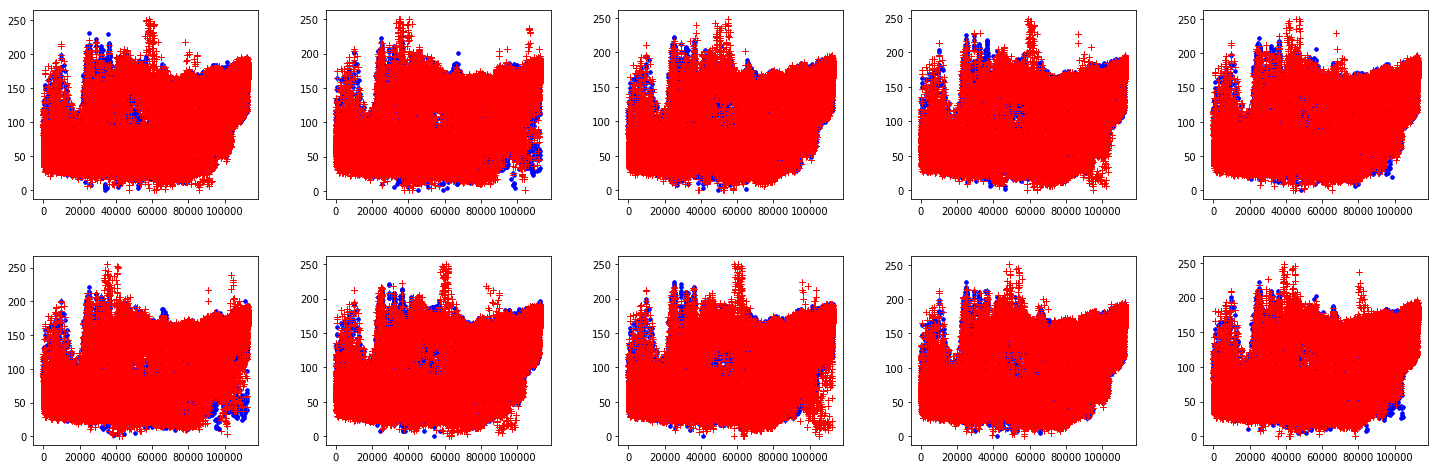

In [17]:
fig, axs = plt.subplots(2,5, figsize=(25,8))
fig.subplots_adjust(hspace = 0.3, wspace=0.3)
axs = axs.ravel()

for i, (imgs_tr, imgs_te) in enumerate(zip(train_images[15:25], test_images[15:25])):
    axs[i].plot(imgs_tr.ravel(), 'b.')
    axs[i].plot(imgs_te.ravel(), 'r+')
    

In [12]:
train_images_ = []
for image in train_images:
    train_images_.append(util.noise.random_noise(image))
    
test_images_ = []
for image in test_images:
    test_images_.append(util.noise.random_noise(image))
    

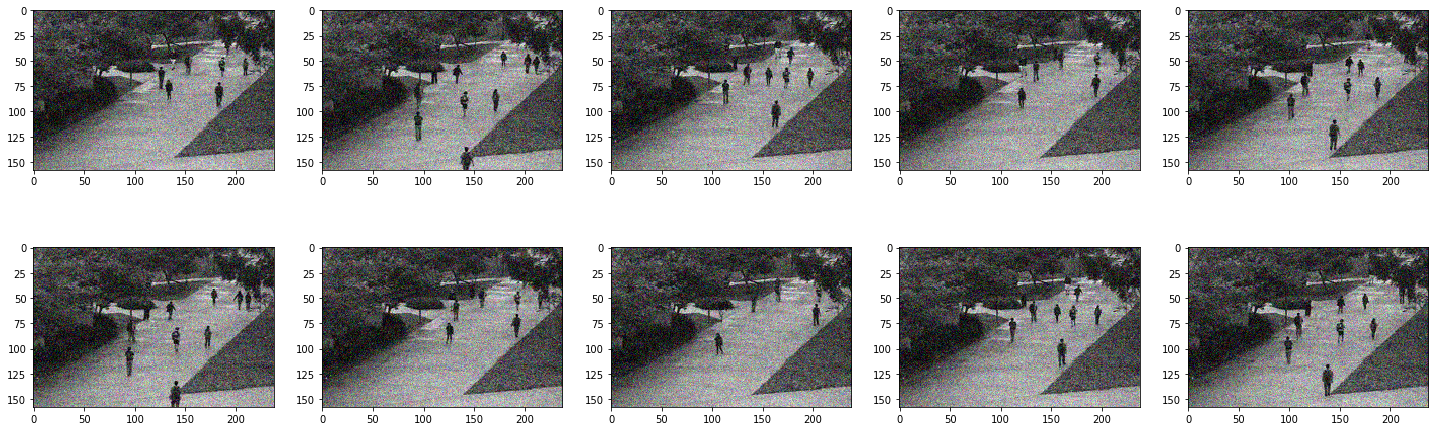

In [14]:
fig, axs = plt.subplots(2,5, figsize=(25,8))
axs = axs.ravel()

for i, imgs in enumerate(train_images_[15:25]):
    axs[i].imshow(imgs[:,:,:])

In [13]:
np.save('{}/train'.format(Dataset.main),train_images)
np.save('{}/train_'.format(Dataset.main),train_images_)

np.save('{}/test'.format(Dataset.main),test_images)
np.save('{}/test_'.format(Dataset.main),test_images_)